**<p style="text-align: center;"><font size= "8" color = "BLACK">CUSTOMER REVIEWS ON AMAZON</font></p>**

# Data Info

Amazon is a multinational technology which specilizes in different areas: retailers, cloud service providers etc. The area which is focused in this analyis is Amazon Marketplace where third_party resellers are able to sell their products on a fixed-price online marketplace alongside Amazon's regular offerings.

Amazon MarketPlace offers 02 free APIs: Product Advertising API and the Amazon MWS API. However, in order to access to those API, one must be their valid seller. Thus, this analysis will use the free but limited API on rapidapi via [this link](https://rapidapi.com/logicbuilder/api/amazon-product-reviews-keywords)

# Import necessary libraries

In [2]:
import requests
import json
import pandas as pd
import string
from wordcloud import WordCloud, STOPWORDS 
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import cufflinks as cf
from plotly.offline import iplot
%matplotlib inline
cf.go_offline(connected=True)
from textblob import TextBlob
from itertools import chain
pd.options.display.float_format = '{:.2f}'.format

# Get data from the API

The API provides three endpoints: Product search, Product reviews and Product details. The Product reviews endpoint was selected for this analysis. Under this endpoint, rapid api offers 25 requests per month for 01 free account. Each request generate 1 page with 10 reviews per page.

All needed for the request are ASIN and the page number. ASINs Amazon Standard Identification Numbers (ASINs) are unique blocks of 10 letters and/or numbers that identify items, which can be looked up on Amazon market place.

Three products that were selected for this analysis are:**Drunk Elephant**, **Skinceuticals** and **SkinMedica**. They are all retinol 1% cream with the same volume (1 oz). It costs 70usd , 103usd , 93usd for Drunk Elephant, Skinceutials and SkinMedica respectively.

In [6]:
product_asin_list = {"B07KZSP4ZG":"Drunk Elephant","B007S2CJY8": "Skinceuticals", "B00G193SGW": "SkinMedica"}

**Function for getting 01 request**

In [45]:
# def trigger_api(product_asin, page_no):

#   querystring = {"page": str(page_no) ,  "country":"US" , "asin": product_asin}

#   headers = {
#     'x-rapidapi-host': "amazon-product-reviews-keywords.p.rapidapi.com",
#     'x-rapidapi-key': "___"
#   }

#   url = "https://amazon-product-reviews-keywords.p.rapidapi.com/product/reviews"

#   response = requests.request("GET", url, headers=headers, params=querystring)

#   if(200 == response.status_code):
#     return json.loads(response.text)
#   else:
#     return None

In [4]:
# drunk_elephant_1 = trigger_api("B07KZSP4ZG",1)
# drunk_elephant_2 = trigger_api("B07KZSP4ZG",2)
# drunk_elephant_3 = trigger_api("B07KZSP4ZG",3)
# skinceuticals_1 = trigger_api("B007S2CJY8",1)
# skinceuticals_2 = trigger_api("B007S2CJY8",2)
# *skinceuticals_3 = trigger_api("B007S2CJY8",3)
# medica_1 = trigger_api("B00G193SGW",1)
# medica_2 = trigger_api("B00G193SGW",2)
# medica_3 = trigger_api("B00G193SGW",3)

In [3]:
#there is a problem with skinceuticals_3. It showed non_type object, thus, errors occured when moving next steps
# url = "https://amazon-product-reviews-keywords.p.rapidapi.com/product/reviews"

# querystring = {"asin":"B007S2CJY8","page":"3","country":"US","variants":"1","top":"0"}

# headers = {
#     'x-rapidapi-key': "___",
#     'x-rapidapi-host': "amazon-product-reviews-keywords.p.rapidapi.com"
#     }

# response_ = requests.request("GET", url, headers=headers, params=querystring)

# skinceuticals_3 = json.loads(response_.text)

In [5]:
# files = [drunk_elephant_1,drunk_elephant_2, drunk_elephant_3,
#          skinceuticals_1, skinceuticals_2, skinceuticals_3,
#          medica_1, medica_2, medica_3]

In [6]:
# reviews = []
# for file in files:
#     reviews += file["reviews"] 
    
# df_list = []
# for review in reviews:
#     df_list.append(pd.DataFrame(review))
    
# df_all = pd.concat(df_list)

**Raw data getting directly from the API**

In [473]:
df_all.head()

,id,asin,review_data,date,name,rating,title,review,verified_purchase
original,RD7DEQ5VGCIKN,B07KZSP4ZG,"Reviewed in the United States on December 19, ...",NaN,Jill V,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,True
variant,RD7DEQ5VGCIKN,,"Reviewed in the United States on December 19, ...",NaN,Jill V,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,True
date,RD7DEQ5VGCIKN,NaN,"Reviewed in the United States on December 19, ...","December 19, 2020",Jill V,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,True
unix,RD7DEQ5VGCIKN,NaN,"Reviewed in the United States on December 19, ...",1608343200,Jill V,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,True
original,R1VCDUIIM1XX1O,B07KZSP4ZG,"Reviewed in the United States on November 3, 2020",NaN,Raysa,4,Really nice cream.,This is what I like to use for my face. Drunk ...,True


In [474]:
df_all.shape

(390, 9)

**Clean raw data**

In [479]:
df_all_1 = df_all.loc[(df_all.index=="date") | (df_all.index=="original")]

In [480]:
df_all_1.head()

,id,asin,review_data,date,name,rating,title,review,verified_purchase
original,RD7DEQ5VGCIKN,B07KZSP4ZG,"Reviewed in the United States on December 19, ...",NaN,Jill V,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,True
date,RD7DEQ5VGCIKN,NaN,"Reviewed in the United States on December 19, ...","December 19, 2020",Jill V,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,True
original,R1VCDUIIM1XX1O,B07KZSP4ZG,"Reviewed in the United States on November 3, 2020",NaN,Raysa,4,Really nice cream.,This is what I like to use for my face. Drunk ...,True
date,R1VCDUIIM1XX1O,NaN,"Reviewed in the United States on November 3, 2020","November 3, 2020",Raysa,4,Really nice cream.,This is what I like to use for my face. Drunk ...,True
original,R6XUU4IAY26T2,B07KZSP4ZG,"Reviewed in the United States on October 4, 2020",NaN,Alisyn,5,"Save your pennies, this is not a drill",At $75 a pop I was reluctant to buy this produ...,True


In [481]:
df_all_1.date = df_all_1.date.fillna(method = "bfill")

In [483]:
df_all_1

,id,asin,review_data,date,name,rating,title,review,verified_purchase
original,RD7DEQ5VGCIKN,B07KZSP4ZG,"Reviewed in the United States on December 19, ...","December 19, 2020",Jill V,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,True
date,RD7DEQ5VGCIKN,NaN,"Reviewed in the United States on December 19, ...","December 19, 2020",Jill V,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,True
original,R1VCDUIIM1XX1O,B07KZSP4ZG,"Reviewed in the United States on November 3, 2020","November 3, 2020",Raysa,4,Really nice cream.,This is what I like to use for my face. Drunk ...,True
date,R1VCDUIIM1XX1O,NaN,"Reviewed in the United States on November 3, 2020","November 3, 2020",Raysa,4,Really nice cream.,This is what I like to use for my face. Drunk ...,True
original,R6XUU4IAY26T2,B07KZSP4ZG,"Reviewed in the United States on October 4, 2020","October 4, 2020",Alisyn,5,"Save your pennies, this is not a drill",At $75 a pop I was reluctant to buy this produ...,True
...,...,...,...,...,...,...,...,...,...
date,R1BMHHF6TPUKW,NaN,"Reviewed in the United States on July 6, 2019","July 6, 2019",Leslie,4,"Value is questionable, but still happy with pr...","I really like this product, but I’m not convin...",True
original,R1MBDPU68DW8B,B00G193SGW,"Reviewed in the United States on June 28, 2019","June 28, 2019",Amazon Customer,5,Great product for Acne,Skin medical is a great brand... amazon prices...,True
date,R1MBDPU68DW8B,NaN,"Reviewed in the United States on June 28, 2019","June 28, 2019",Amazon Customer,5,Great product for Acne,Skin medical is a great brand... amazon prices...,True
original,R31ZVU2YVJHZE1,B00G193SGW,"Reviewed in the United States on June 18, 2019","June 18, 2019",Kathy C,5,real stuff,"Love it, Keeps those age spots away",True


In [484]:
df_all_1 = df_all_1.loc[df_all_1.index == "original"]

In [485]:
df_all_1

,id,asin,review_data,date,name,rating,title,review,verified_purchase
original,RD7DEQ5VGCIKN,B07KZSP4ZG,"Reviewed in the United States on December 19, ...","December 19, 2020",Jill V,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,True
original,R1VCDUIIM1XX1O,B07KZSP4ZG,"Reviewed in the United States on November 3, 2020","November 3, 2020",Raysa,4,Really nice cream.,This is what I like to use for my face. Drunk ...,True
original,R6XUU4IAY26T2,B07KZSP4ZG,"Reviewed in the United States on October 4, 2020","October 4, 2020",Alisyn,5,"Save your pennies, this is not a drill",At $75 a pop I was reluctant to buy this produ...,True
original,RJK6D1NCDZ9YY,B07KZSP4ZG,"Reviewed in the United States on October 2, 2020","October 2, 2020",Ana,5,Muy buena inversion,Excelente para principuantes en usar retinol e...,True
original,R1QNVYPS7ZY7MV,B07KZSP4ZG,"Reviewed in the United States on September 30,...","September 30, 2020",Piggy on the Moon,1,What the Heck?,All these guys do is talk about how fabulous t...,False
...,...,...,...,...,...,...,...,...,...
original,RAA6CLQRCVFX7,B00G193SGW,"Reviewed in the United States on July 12, 2019","July 12, 2019",Amazon Customer,5,Results,Have used this product for some time now,True
original,R2MK0F6UBJ24LW,B00G193SGW,"Reviewed in the United States on July 9, 2019","July 9, 2019",tabykat7,5,This is the best retinal out there,This is the best retinal out there,True
original,R1BMHHF6TPUKW,B00G193SGW,"Reviewed in the United States on July 6, 2019","July 6, 2019",Leslie,4,"Value is questionable, but still happy with pr...","I really like this product, but I’m not convin...",True
original,R1MBDPU68DW8B,B00G193SGW,"Reviewed in the United States on June 28, 2019","June 28, 2019",Amazon Customer,5,Great product for Acne,Skin medical is a great brand... amazon prices...,True


**Save the data**

In [486]:
# df_all_1.to_csv('~/Integrify/Lecture/API/amazon.csv')

# DATA ANALYSIS

In [48]:
df = pd.read_csv("amazon.csv",parse_dates=["date"])

In [49]:
df.head(3)

,Unnamed: 0,id,asin,review_data,date,name,rating,title,review,verified_purchase
0,original,RD7DEQ5VGCIKN,B07KZSP4ZG,"Reviewed in the United States on December 19, ...",2020-12-19,Jill V,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,True
1,original,R1VCDUIIM1XX1O,B07KZSP4ZG,"Reviewed in the United States on November 3, 2020",2020-11-03,Raysa,4,Really nice cream.,This is what I like to use for my face. Drunk ...,True
2,original,R6XUU4IAY26T2,B07KZSP4ZG,"Reviewed in the United States on October 4, 2020",2020-10-04,Alisyn,5,"Save your pennies, this is not a drill",At $75 a pop I was reluctant to buy this produ...,True


## Data cleaning

In [50]:
#Create a "Product" columns for facilitate further analysis
df["Product"] = df.asin.apply(lambda x: product_asin_list[x])

In [51]:
#Check if the review_data contains any useful information for analysis
pattern = r"(?<=in\s)(.+)(?=\son)"
df["review_place"] = df.review_data.str.extract(pattern)
df.review_place.unique()

array(['the United States'], dtype=object)

In [52]:
#because I manually concat skinceuticals, I want to make sure that I dont include any duplicated id by mistake
df.id.nunique()

90

In [53]:
#check duplicates
df.duplicated().sum()

0

In [54]:
#drop un-used columns
df.drop(["Unnamed: 0","id","review_data","name","asin","review_place"], axis=1, inplace = True)

In [55]:
df.head(3)

,date,rating,title,review,verified_purchase,Product
0,2020-12-19,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,True,Drunk Elephant
1,2020-11-03,4,Really nice cream.,This is what I like to use for my face. Drunk ...,True,Drunk Elephant
2,2020-10-04,5,"Save your pennies, this is not a drill",At $75 a pop I was reluctant to buy this produ...,True,Drunk Elephant


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               90 non-null     datetime64[ns]
 1   rating             90 non-null     int64         
 2   title              90 non-null     object        
 3   review             90 non-null     object        
 4   verified_purchase  90 non-null     bool          
 5   Product            90 non-null     object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.7+ KB


## Date and Rating

### Rating

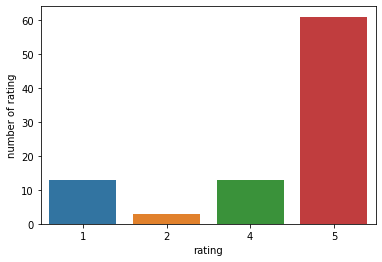

In [57]:
sns.countplot(x = "rating", data = df);
plt.ylabel("number of rating");

<div style='background-color:navy; color:white; padding:20px'>
    Generally, those products mostly received good ratings (4 and 5), especically the best rating (5) while there was no average rating (level 3) in the latest 30 reviews.
</div>

In [58]:
rating_df = pd.DataFrame(round(df.groupby("Product").rating.mean(),1))
amazon_rating = pd.DataFrame({"amazon_rating": {"Drunk Elephant": 4.6, "SkinMedica": 4.6, "Skinceuticals":4.6}})
old_combined_rating = pd.concat([rating_df, amazon_rating], axis=1).reset_index()
old_combined_rating["difference"] = old_combined_rating.amazon_rating - old_combined_rating.rating
verified_df = pd.DataFrame(df.groupby("Product").verified_purchase.value_counts()).unstack(fill_value=0).reset_index()
c = pd.concat([old_combined_rating,verified_df],axis=1)
c = c.drop(('Product', ''),axis=1)
c.columns = ["Product", "rating","amazon_rating","difference","non_verified_reviewer", "verified_reviewer"]

In [59]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

c.style.apply(highlight_max,axis=0,subset=["difference","non_verified_reviewer"])

,Product,rating,amazon_rating,difference,non_verified_reviewer,verified_reviewer
0,Drunk Elephant,3.900000,4.600000,0.700000,4,26
1,SkinMedica,4.300000,4.600000,0.300000,1,29
2,Skinceuticals,4.300000,4.600000,0.300000,0,30


<div style='background-color:navy; color:white; padding:20px'>
Three brand average rating in this analysis are below the average listed on Amazon, especically with Drunk Elephant. The brand also have the highest number of non_verified_reviewers. Thus, further investigation would be conducted on non_verified_reviewer and rating.
</div>

In [60]:
df[df["verified_purchase"] == False][["Product","rating"]]

,Product,rating
4,Drunk Elephant,1
16,Drunk Elephant,5
22,Drunk Elephant,1
29,Drunk Elephant,2
62,SkinMedica,2


<div style='background-color:navy; color:white; padding:20px'>
Most of the reviews comming from non_verified_purchase are negative. Though there was on rating 5 on Drunk Elephant, but on average, the non_verfied_purchase rating lowered the average rating of the product.
With the assumption that only verified_purchase reviews are trustworthy, review comming from "non_verified_purchase" are dropped.
</div>

In [61]:
df = df[df["verified_purchase"]==True]
df = df.drop("verified_purchase", axis=1)

In [62]:
df.reset_index(inplace=True)

In [63]:
df = df.drop("index",axis=1)

In [64]:
new_rating_df = pd.DataFrame(round(df.groupby("Product").rating.mean(),1))
amazon_rating = pd.DataFrame({"amazon_rating": {"Drunk Elephant": 4.6, "SkinMedica": 4.6, "Skinceuticals":4.6}})
new_combined_rating = pd.concat([new_rating_df, amazon_rating], axis=1).reset_index().melt(id_vars="Product",var_name="rating_type",value_name="avr_rating")
px.scatter(new_combined_rating, x= "Product", y = "avr_rating", color = "rating_type", width=500, height=300)

<div style='background-color:navy; color:white; padding:20px'>
    After dropping non_verified_purchased review, the average of Drunk Elephant and SkinMedia went up but still less than the average rating less than the average rating listed on Amazon. It can be due to:
    <li>Under this analysis, the sample size is small. 
    <li>Amazon has different approach in calculate the average star rating. They dont use simple average but consider: + how recent the review is + if a reviewer is verified + verify the trustworthiness of reviews
</div>

In [65]:
from plotly.subplots import make_subplots
def pie_by_brand(col, name, data=df):
    for_pie = pd.crosstab(index=data.Product, columns=data[col])
    labels = for_pie.columns
    specs = [[{'type':'domain'},{'type':'domain'},{'type':'domain'}]]
    fig = make_subplots(rows=1, cols=3, specs=specs)
    fig.add_trace(go.Pie(labels=labels, values = for_pie.loc["Drunk Elephant"], name='Drunk Elephant'),1,1)
    fig.add_trace(go.Pie(labels=labels, values = for_pie.loc["SkinMedica"], name='SkinMedica'),1,2)
    fig.add_trace(go.Pie(labels=labels, values = for_pie.loc["Skinceuticals"], name='Skinceuticals'),1,3)
    fig.update_traces(hole=.4, hoverinfo="label+percent")
    fig.update_layout(
    title_text= name,
    annotations=[dict(text='Drunk Elephant', x=0.095, y=0.5, font_size=10, showarrow=False),
                 dict(text='SkinMedica', x=0.5, y=0.5, font_size=10, showarrow=False),
                dict(text='Skinceuticals', x=0.9, y=0.5, font_size=10, showarrow=False)])
    return fig.show()

In [66]:
pie_by_brand("rating", "Rating by brand")

<div style='background-color:navy; color:white; padding:20px'>
    Though SkinMedia obtained the highest average rating under this analysis (4.4), Skinceutials is the brand that received the least bad ratings (only 10%).
    Drunk Elephant not only received the lowest average rating (4.1) but also received the highest proportion of bad rating (approximately 19.2%)
</div>

### Date

In [67]:
date_df = pd.DataFrame(df.groupby("Product").date.agg([np.min, np.max], axis=1))
date_df["duration"] = date_df.amax - date_df.amin
date_df["days per review"] = round((date_df.duration.dt.total_seconds()/(60*60*24))/30,2)
date_df

,amin,amax,duration,days per review
Product,,,,
Drunk Elephant,2019-09-24,2020-12-19,452 days,15.07
SkinMedica,2019-06-18,2020-12-16,547 days,18.23
Skinceuticals,2019-06-22,2020-11-19,516 days,17.20


<div style='background-color:navy; color:white; padding:20px'>
    <li>On average, it tooks 15 days for 01 review to be published. 
</div>

In [98]:
time_plot = df.pivot_table(index="date",values="rating",columns="Product",aggfunc="count").resample("MS").sum()
fig = px.bar(time_plot, x=time_plot.index,y=time_plot.columns, title = "Reviews by month",
            color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_layout(xaxis=dict(title = "Month"),
    yaxis=dict(title= 'number of reviews')
                 ),
fig.show()

<div style='background-color:navy; color:white; padding:20px'>
   <li>There was no significance difference between the number of reviews on three products by month. In Jan 2020, SkinCeuticals received its max number of reviews of 5, Skinmedica aslo received its max of 4 reviews in the same month, while in the previous two months, Nov and Dec 2019, Drunk Elephants received 4 reviews.
   <li>The most noticable from this chart is the last 4 months of 2020, while SkinMedica and Drunk Elephants receive reviews each month, Skinceuticals only received 2 reviews in 4 months which indicated Skinceuticals reviews are more outdated compared to the other two products.
</div>

### Title length and review length

In [69]:
#create title_length and review_length
df["title_length"] = df.title.str.split().str.len()
df["review_length"] = df.review.str.split().str.len()

In [99]:
df[["review_length","title_length"]].describe().loc[["mean","min","50%","max"]]

,review_length,title_length
mean,40.33,3.92
min,1.00,1.00
50%,22.00,3.00
max,476.00,18.00


In [113]:
fig = px.strip(df, x="rating", y="review_length", color = "Product")
fig.add_hline(y=9,line_dash="dot", line_color="black", line_width=0.3,
             annotation_text="9",annotation_position="bottom left")
fig.show()

In [115]:
df[df.review_length <= 8]["rating"].unique()

array([4, 5])

<div style='background-color:navy; color:white; padding:20px'>
    There is no clear pattern between "length of review" and "rating". However, the four longest reviews have the good ratings. Yet, if the reviews are shorter than 9 letters, they have good rating (4 & 5)
</div>

In [73]:
fig = px.strip(df, x="rating", y="title_length",color = "Product")
fig.add_hline(y=1,line_dash="dot", line_color="black", line_width=0.3)
fig.show()

In [75]:
print(df[(df.Product == "SkinMedica") & (df.title_length == 1) & (df.rating ==1)]["title"])
list(df[(df.Product == "SkinMedica") & (df.title_length == 1) & (df.rating ==1)]["review"])

70    🤔
Name: title, dtype: object


["I love this product. It's efficacy is science-backed and it's price is fair. But I ordered the 1% and to my disappointment received the. 25% instead. Not sure what to say about this, other than I would have much preferred receiving what I actually ordered."]

In [77]:
df[df.title_length == 1][["title","rating"]]

,title,rating
10,Exelente,5
11,Works.,4
12,Recommend!,5
23,Great!,5
36,amazing!!,5
41,effective,5
54,Best!!!!!,5
68,Price,5
70,🤔,1
80,Results,5


<div style='background-color:navy; color:white; padding:20px'>
    Briefly, there also no clear pattern between the "title length" and "rating". If the title of the review only has 1 word, it is more likely that the review rating score is high.
</div>

### Sentiment Analysis

Sentiment text analysis:
Sentiment analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

Subjective analysis is where the feeling of the individual taking part in the analysis process determines the outcome. 

Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]

In [78]:
def sentiment_test(col, data=df):
    sentiment_list = []
    for row in df[col]:
        my_valence = TextBlob(row)
        sentiment_list.append(my_valence.sentiment)
    return pd.DataFrame(sentiment_list)

In [79]:
title_sentiment = sentiment_test("title") #return a dataframe
content_sentiment = sentiment_test("review")
#concat the title sentiment dataframe with the original dataframe and rename columns, called df_a
df_a = pd.concat([df,title_sentiment], axis=1)
df_a.rename(columns={"polarity":"title_polarity","subjectivity":"title_subjectivity"},inplace=True)
#concat the content sentiment dataframe with the original dataframe
df_b = pd.concat([df_a,content_sentiment], axis=1)
df_b.rename(columns={"polarity":"content_polarity","subjectivity":"content_subjectivity"},inplace=True)
df_b[["content_polarity","content_subjectivity"]] = df_b[["content_polarity","content_subjectivity"]].apply(lambda x: round(x,2))
df_b.head(3)

,date,rating,title,review,Product,title_length,review_length,title_polarity,title_subjectivity,content_polarity,content_subjectivity
0,2020-12-19,5,Part of my Teen's SKin Care Regimen,Works great! Helps keep her skin nice and clear.,Drunk Elephant,7,9,0.00,0.00,0.57,0.71
1,2020-11-03,4,Really nice cream.,This is what I like to use for my face. Drunk ...,Drunk Elephant,3,40,0.60,1.00,0.23,0.70
2,2020-10-04,5,"Save your pennies, this is not a drill",At $75 a pop I was reluctant to buy this produ...,Drunk Elephant,8,142,0.00,0.00,0.17,0.35


In [32]:
import plotly.figure_factory as ff
corr_df = df_b.select_dtypes(include=["float64","int64"]).corr()
x = corr_df.columns.tolist()
y = corr_df.index.tolist()
fig = ff.create_annotated_heatmap(corr_df.values, x=x, y=y, annotation_text=np.around(corr_df.values,2))
fig.show()

<div style='background-color:navy; color:white; padding:20px'>
    There is almost no high correlation between numeric variables
</div>

#### Subjective and non_subjective reviews

In [85]:
#create a title_subjectivity_cat column
df_b['title_subjectivity_cat'] = "_"
df_b.loc[(df_b.title_subjectivity <= 0.6), "title_subjectivity_cat"] = "non_subjective"
df_b.loc[(df_b.title_subjectivity > 0.6), "title_subjectivity_cat"] = "subjective"

#create a content_subjectivity_cat column
df_b['content_subjectivity_cat'] = "_"
df_b.loc[(df_b.content_subjectivity <= 0.6), "content_subjectivity_cat"] = "non_subjective"
df_b.loc[(df_b.content_subjectivity > 0.6), "content_subjectivity_cat"] = "subjective"

In [86]:
con_sub = pd.crosstab(index=df_b.Product, columns=[df_b.content_subjectivity_cat],normalize=True)*100
tit_sub = pd.crosstab(index=df_b.Product, columns=[df_b.title_subjectivity_cat],normalize=True)*100
sub = pd.concat([con_sub,tit_sub],axis=1)
sub.columns = ["non_subjective_content (%)", "subjective_content (%)","non_subjective_title (%)","subjective_title (%)"]
sub.style.apply(highlight_max,axis=0)

,non_subjective_content (%),subjective_content (%),non_subjective_title (%),subjective_title (%)
Product,,,,
Drunk Elephant,20.000000,10.588235,18.823529,11.764706
SkinMedica,27.058824,7.058824,23.529412,10.588235
Skinceuticals,23.529412,11.764706,15.294118,20.000000


<div style='background-color:navy; color:white; padding:20px'>
    Non_subjective opinions overweight subjective opinions in both "title" and "content" of the review.
    Among three brands, SkinMedica received the most non_subjective opinion whereas Skinceuticals received the most subjective ones.
</div>

#### Polarity scores

In [88]:
def hist_plot(col, data=df_b):
    hist_data = []
    for brand in df_b.Product.unique():
        hist_data.append(df_b[df_b.Product == brand][col])
    fig = ff.create_distplot(hist_data, df_b.Product.unique(),colors = ['#393E46', '#2BCDC1', '#F66095'])
    fig.add_vline(x=0,line_dash="dash", line_color="blue")
    fig.show()

In [89]:
hist_plot("content_polarity")

<div style='background-color:navy; color:white; padding:20px'>
    A majority of the review content have a polarity score from 0 to 0.5, indicating that most of the reviews contained positive meassages. Under sentiment analysis, no product received extreme negative reviews (polarity score = -1) and each of them received 1 extreme positive review (polarity score = 1)
</div>

In [90]:
hist_plot("title_polarity")

<div style='background-color:navy; color:white; padding:20px'>
    Though similar to the review content, review title aslo has the positive message, the polarity score in the title widely spread from 0 to 1. Under sentiment analysis, no product received extreme negative reviews (polarity score = -1) and each of them received 1 extreme positive review (polarity score = 1)
</div>

In [121]:
fig = px.strip(df_b, x="rating",y="content_polarity",color = "Product")
fig.add_hrect(y0=-0.2, y1=0.7, line_width=0, fillcolor="red", opacity=0.2)
fig.show()

In [92]:
for i in df_b[(df_b.rating == 5) & (df_b.content_polarity < 0)]["review"]:
    print(i)

It definitely works well. I don’t have sensitive skin. Not sure how someone would feel with sensitive skin
Cleans up all my dead skin . And it works wonders.
I have used this product in the past with good results, then took a detour into less expensive products. Lesson learned - the concentration of retinol in cheaper items doesn’t compare with this night cream. I’m back to stay!
Order it on Amazon and you won't be disappointed.


In [120]:
df_b[(df_b.rating == 5) & (df_b.content_polarity < 0) & (df_b.Product == "SkinMedica")][["review","content_polarity"]]

,review,content_polarity
78,Order it on Amazon and you won't be disappointed.,-0.75


<div style='background-color:navy; color:white; padding:20px'>
    Though there is no clear pattern between polarity score and rating, it is likely that for Drunk Elephant and for SkinMedica, good ratings (level 4 and 5) were only given when the conten polarity is higher than 0. Especially when the content polarity is higher than 0.7, the products were rated as 5 star.
</div>

In [117]:
fig = px.strip(df_b, x="rating",y="title_polarity",color = "Product")
fig.add_hrect(y0=-0.7, y1=0.4, line_width=0, fillcolor="red", opacity=0.2)
fig.show()

<div style='background-color:navy; color:white; padding:20px'>
    Generally, it is likely that no pattern between title polarity and rating for all 3 products. However, when the polarity score is lower than -0.7, the rating of the review is likely to be low while when the polarity score is higher than 0.4, the review was rated higher.
</div>

#### WORDCLOUD

In [94]:
df_b["clean_review"] = df_b.review.apply(lambda x: x.lower())
df_b["clean_review"] = df_b.clean_review.apply(lambda x: "".join([i for i in x if i not in string.punctuation]))
df_b.clean_review = df_b.clean_review.apply(lambda x: " ".join([x for x in x.split() if x.isalpha()]))
df_b.clean_review = df_b.clean_review.apply(lambda x: " ".join([x for x in x.split() if x not in ("product","retinol","use","used",
                                                                                                 "using","skin","face","will","cream")]))
df_b.clean_review.head()

0            works great helps keep her nice and clear
1    this is what i like to for my drunk elephant i...
2    at a pop i was reluctant to buy this it had be...
3    excelente para principuantes en usar en su rut...
4    this may be the best ever tried sure it smells...
Name: clean_review, dtype: object

In [95]:
def word_cloud_generate(brand, rating):
    #brand = ["Drunk Elephant", "Skinceticals","SkinMedica"]
    #rating = ["Good", "Bad"] ("Good" is 4 or 5, "Bad" is 1 or 2)
    rating = rating.lower()
    if rating == "good":
        wordcloud_data = pd.DataFrame(df_b[((df_b.rating == 4) | (df_b.rating == 5)) & (df_b.Product == brand)]["clean_review"])
    elif rating == "bad":
        wordcloud_data = pd.DataFrame(df_b[((df_b.rating == 1) | (df_b.rating == 2)) & (df_b.Product == brand)]["clean_review"])

    wordcloud_string =  " ".join([i for i in chain.from_iterable(map(str.split, wordcloud_data.clean_review.tolist()))])
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(wordcloud_string) 
    plt.figure(figsize = (4, 4), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(rating.title() + " rating of " + brand) 
    return plt.show()

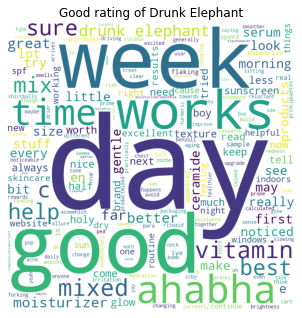

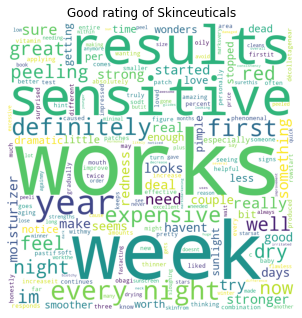

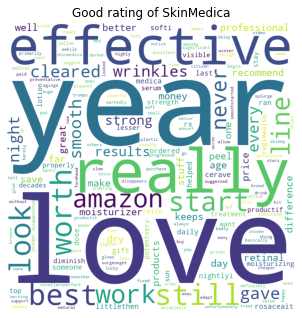

In [96]:
for i in range(3):
    word_cloud_generate(df_b.Product.unique()[i],"good")

<div style='background-color:navy; color:white; padding:20px'>
    There were only positive words popped out in the good rating reviews
</div>

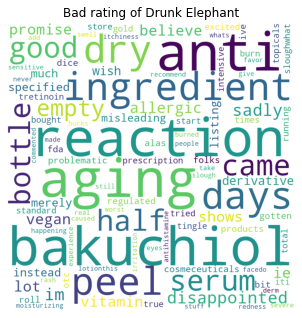

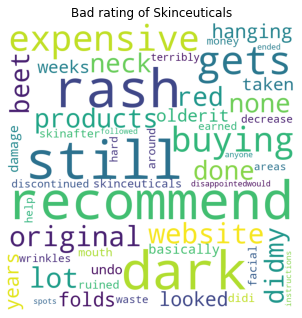

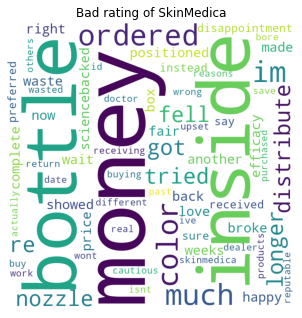

In [97]:
for brand in df_b.Product.unique():
    word_cloud_generate(brand,"bad")

<div style='background-color:navy; color:white; padding:20px'>
    There some words popped out that are important:
    <li> Drunk Elephant: "reaction", "dry"
    <li> Skinceuticals: "expensive", "rash"
    <li> SkinMedica: "money"
</div>

<div style='background-color:navy; color:white; padding:20px'>
    If one product needs to be selected for using or for selling under this analysis, I would go with SkinMedia:
    <li> Its overall rating is the best in the latest 30 reviews.
    <li> Its reviews do not as outdated as Skinceuticals.
    <li> Its review´s title and content are least subjective.
    <li> If price does not matters and the only concern is quality
</div>

In [139]:
# list(df_b[(df_b.Product == "Skinceuticals") & (df_b.content_polarity == -0.2)]["rating"])

In [140]:
# valence = TextBlob("Cleans up all my dead skin. And it works wonders")
# valence.sentiment

In [87]:
#create a content_polarity_cat column
# df_b['content_polarity_cat'] = "_"
# df_b.loc[(df_b.content_polarity == 0), "content_polarity_cat"] = "neutral"
# df_b.loc[(df_b.content_polarity > 0), "content_polarity_cat"] = "positive"
# df_b.loc[(df_b.content_polarity < 0), "content_polarity_cat"] = "negative"

#create a title_polarity_cat column
# df_b['title_polarity_cat'] = "_"
# df_b.loc[(df_b.title_polarity == 0), "title_polarity_cat"] = "neutral"
# df_b.loc[(df_b.title_polarity > 0), "title_polarity_cat"] = "positive"
# df_b.loc[(df_b.title_polarity < 0), "title_polarity_cat"] = "negative"

In [91]:
# def polarity_by_brand(brand,data=df_b):
#     polarity_df = pd.DataFrame(df_b[df_b.Product== brand].groupby(["rating_cat","content_polarity_cat"]).rating.count()).reset_index()
#     fig =px.sunburst(polarity_df, path = ["rating_cat","content_polarity_cat"],values='rating',
#                     width=400, height=400, title = brand)
#     fig.show()

# df_b[(df_b.Product == "Skinceuticals") & (df_b.content_polarity < 0)][["rating","review","content_polarity"]]